In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [4]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-07-15 11:12:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 64.233.170.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-07-15 11:12:17 (73.3 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [5]:
model = Sequential()
model.add(Embedding(total_words,100,input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(2*total_words,kernel_regularizer='l2',activation='relu'))
model.add(Dense(total_words,activation='softmax'))
# Pick an optimizer
model.compile(loss = "categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 200)           160800    
_________________________________________________________________
dropout (Dropout)            (None, 10, 200)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               240800    
_________________________________________________________________
dense (Dense)                (None, 6422)              1290822   
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              20624253  
Total params: 22,637,775
Trainable params: 22,637,775
Non-trainable params: 0
____________________________________________

In [6]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 8s 17ms/step - loss: 6.9048 - accuracy: 0.0200
Epoch 2/100
484/484 [==============================] - 8s 17ms/step - loss: 6.5155 - accuracy: 0.0248
Epoch 3/100
484/484 [==============================] - 8s 17ms/step - loss: 6.4230 - accuracy: 0.0255
Epoch 4/100
484/484 [==============================] - 8s 17ms/step - loss: 6.3115 - accuracy: 0.0339
Epoch 5/100
484/484 [==============================] - 8s 17ms/step - loss: 6.1891 - accuracy: 0.0383
Epoch 6/100
484/484 [==============================] - 8s 16ms/step - loss: 6.0714 - accuracy: 0.0396
Epoch 7/100
484/484 [==============================] - 8s 17ms/step - loss: 5.9592 - accuracy: 0.0462
Epoch 8/100
484/484 [==============================] - 8s 17ms/step - loss: 5.8412 - accuracy: 0.0512
Epoch 9/100
484/484 [==============================] - 8s 17ms/step - loss: 5.7081 - accuracy: 0.0590
Epoch 10/100
484/484 [==============================] - 8s 17ms/step - loss: 5.603

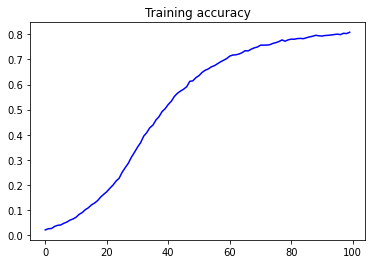

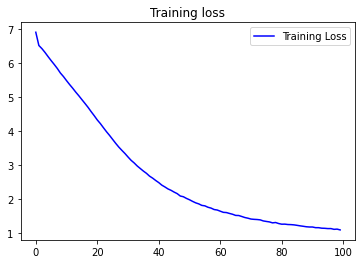

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [11]:
seed_text = "It is raining"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

It is raining the star to every wandering bark ward taken dyed mute hour forth seen made night night more scope and lie to in his friend on men ' now be ill did impute forth thee so love more strong hour ye forth tell her ear they aside aside aside tell ill history that friend new alone so show my state his gentle fiery race delighted night repair still alone well give kind still alone grow light new wastes days hour care to grow mad by mad nor night by crime moan more friend of less thee alone young me one days
